# Battery Model Overview

The battery model in this notebook is implemented in Python. It simulates the behavior of a battery, taking into account factors such as temperature, state of charge (SOC), state of health (SOH), and depth of discharge (DOD).

## Dependencies

The battery model depends on two interfaces: `IEfficiencyAdjuster` and `ISOHCalculator`. These interfaces define the methods for adjusting the efficiency of the battery based on temperature and for calculating the state of health (SOH) of the battery, respectively.

## Battery Class

The `Battery` class is the main class that simulates the battery. It has methods for charging and discharging the battery, adjusting the efficiency based on temperature, and updating the state of health and the number of cycles.

## Exploratory Data Analysis (EDA)

In the following sections, we will perform some exploratory data analysis on the battery model. We will simulate charging and discharging the battery under different conditions and observe how the state of charge, state of health, and efficiency change.


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
sns.set(style="whitegrid")

module_path = os.path.abspath(os.path.join('../'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from scripts.assets import Battery

# Ensure plots are displayed inline in the Jupyter notebook
%matplotlib inline

###  Battery Simulation

In this notebook, we will simulate the behavior of a battery over time as it goes through charge and discharge cycles. We will track two important parameters: the State of Charge (SOC) and the State of Health (SOH).

- **State of Charge (SOC)**: This is a measure of the current battery capacity as a percentage of its maximum capacity. It's similar to the fuel gauge in a car.

- **State of Health (SOH)**: This is a measure of the overall condition of the battery. It's a ratio of the current maximum capacity to the original maximum capacity.

We will create a `Battery` object with a capacity of 10 MWh. We will then define a function `simulate_battery` that simulates charging and discharging the battery for a given number of cycles. In each cycle, the battery is charged and discharged by 5 MWh. The SOC and SOH values are recorded after each charge and discharge.

Finally, we will plot the SOC and SOH values over time to visualize how the battery's state changes over the course of the simulation.

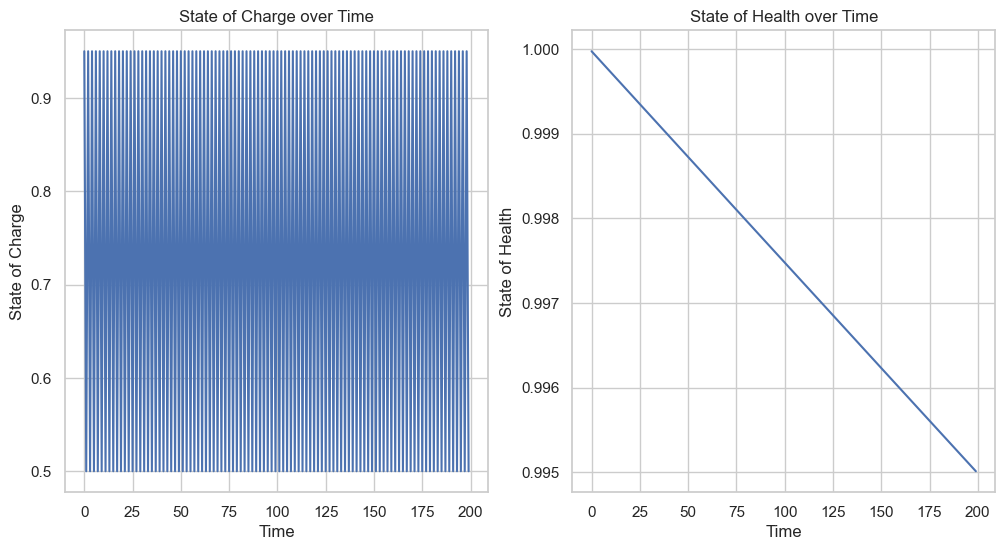

In [3]:
# Create a battery object
battery = Battery(capacity_mwh=10)

# Define a function to simulate charging and discharging
def simulate_battery(battery, cycles, charge_mwh, discharge_mwh):
    soc_values = []
    soh_values = []
    for _ in range(cycles):
        battery.charge(charge_mwh)
        soc_values.append(battery.soc)
        soh_values.append(battery.soh)
        battery.discharge(discharge_mwh)
        soc_values.append(battery.soc)
        soh_values.append(battery.soh)
    return soc_values, soh_values

# Simulate the battery
soc_values, soh_values = simulate_battery(battery, 100, 5, 5)

# Plot the state of charge and state of health
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(soc_values)
plt.title('State of Charge over Time')
plt.xlabel('Time')
plt.ylabel('State of Charge')

plt.subplot(1, 2, 2)
plt.plot(soh_values)
plt.title('State of Health over Time')
plt.xlabel('Time')
plt.ylabel('State of Health')
plt.show()

### Battery Simulation at Different Temperatures

In this section, we extend our battery simulation to consider the effect of temperature. We know that the performance of a battery can vary significantly with temperature, so it's important to consider this factor in our simulation.

We will simulate the behavior of a battery at different temperatures ranging from -10°C to 40°C in steps of 10°C. For each temperature, we create a `Battery` object with a capacity of 10 MWh and the given temperature. We then simulate charging and discharging the battery for 100 cycles, recording the SOC and SOH values after each charge and discharge.

Finally, we plot the SOC and SOH values over time for each temperature. This allows us to visualize how the battery's state changes over the course of the simulation at different temperatures.


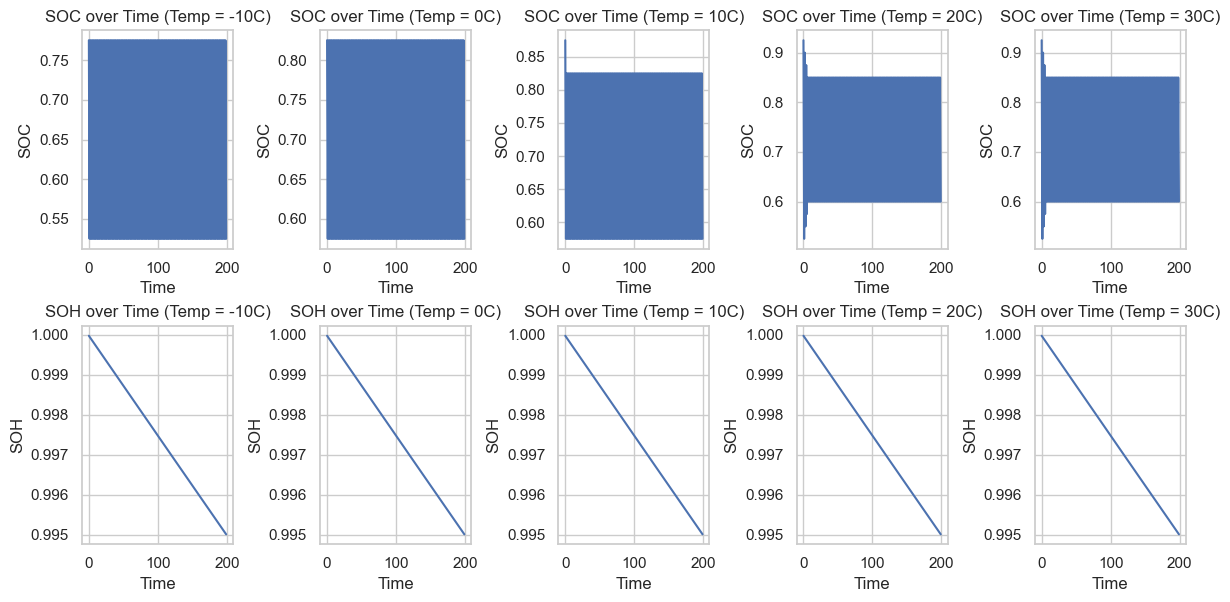

In [4]:
# Set the font size
plt.rcParams['font.size'] = 6

temperatures = range(-10, 40, 10)
soc_values_list = []
soh_values_list = []

for temp in temperatures:
    battery = Battery(capacity_mwh=10, temperature_c=temp)
    soc_values, soh_values = simulate_battery(battery, 100, 5, 5)
    soc_values_list.append(soc_values)
    soh_values_list.append(soh_values)

plt.figure(figsize=(12, 6))

for i, temp in enumerate(temperatures):
    plt.subplot(2, len(temperatures), i+1)
    plt.plot(soc_values_list[i])
    plt.title(f'SOC over Time (Temp = {temp}C)')
    plt.xlabel('Time')
    plt.ylabel('SOC')

    plt.subplot(2, len(temperatures), i+1+len(temperatures))
    plt.plot(soh_values_list[i])
    plt.title(f'SOH over Time (Temp = {temp}C)')
    plt.xlabel('Time')
    plt.ylabel('SOH')

plt.tight_layout()
plt.show()